<a href="https://colab.research.google.com/github/MuhammadAdhikaIsaNugraha/Machine_Learning_2023/blob/main/Pembelajaran_Mesin_Week_12(12_Muhammad_Adhika_Isa_Nugraha_2141720267).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **12/Muhammad Adhika Isa Nugraha/2141720267**

---



# **Job Sheet 12: Optical Character Recognition (OCR) with Tool

---



# Lab Assignment Week 1

To detect text orientation and script type This task aims to detect the orientation of text and the type of script used in an image using Tesseract. Task:

1. Image Preparation:
- Use the provided sample image ('hitchhikers-rotated.png').
- Display the original image using Python and OpenCV
2. Orientation and Script Detection:
- Implement a Python script to detect the text orientation in the image.
- Use Tesseract to obtain the rotation angle and script type

Display the results of the orientation and script type.
Image Preparation: Use the provided sample image ('hitchhikers-rotated.png'). Display the original image using Python and OpenCV. Orientation and Script Detection: Implement a Python script to detect the text orientation in the image. Use Tesseract to obtain the rotation angle and script type. Display the results of the orientation and script type

1. **Image Preparation**

In [ ]:
# 1. Image Preparation
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)

#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)

#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED)

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Adjust the path to the image file
IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/'

# Load the image
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Rest of the code...


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


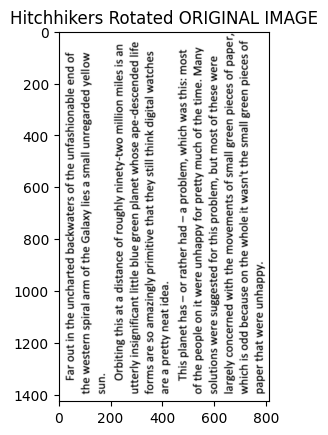

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Adjust the path to the image file
IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/hitchhikers-rotated.png'

# Load the image
image = cv2.imread(IMG_DIR)

# Check if the image is loaded successfully
if image is not None:
    # Check if the image has three channels
    if image.shape[-1] == 3:
        # Split the channels
        b, g, r = cv2.split(image)
        # Merge the channels in RGB order
        rgb_img = cv2.merge([r, g, b])
        # Display the image
        plt.imshow(rgb_img)
        plt.title('Hitchhikers Rotated ORIGINAL IMAGE')
        plt.show()
    else:
        print("Error: Image does not have three channels (not an RGB image).")
else:
    print("Error: Could not read the image.")


2. **Orientation and Script Detection**

Rotation Angle: 90 degrees
Script Type: 17.90


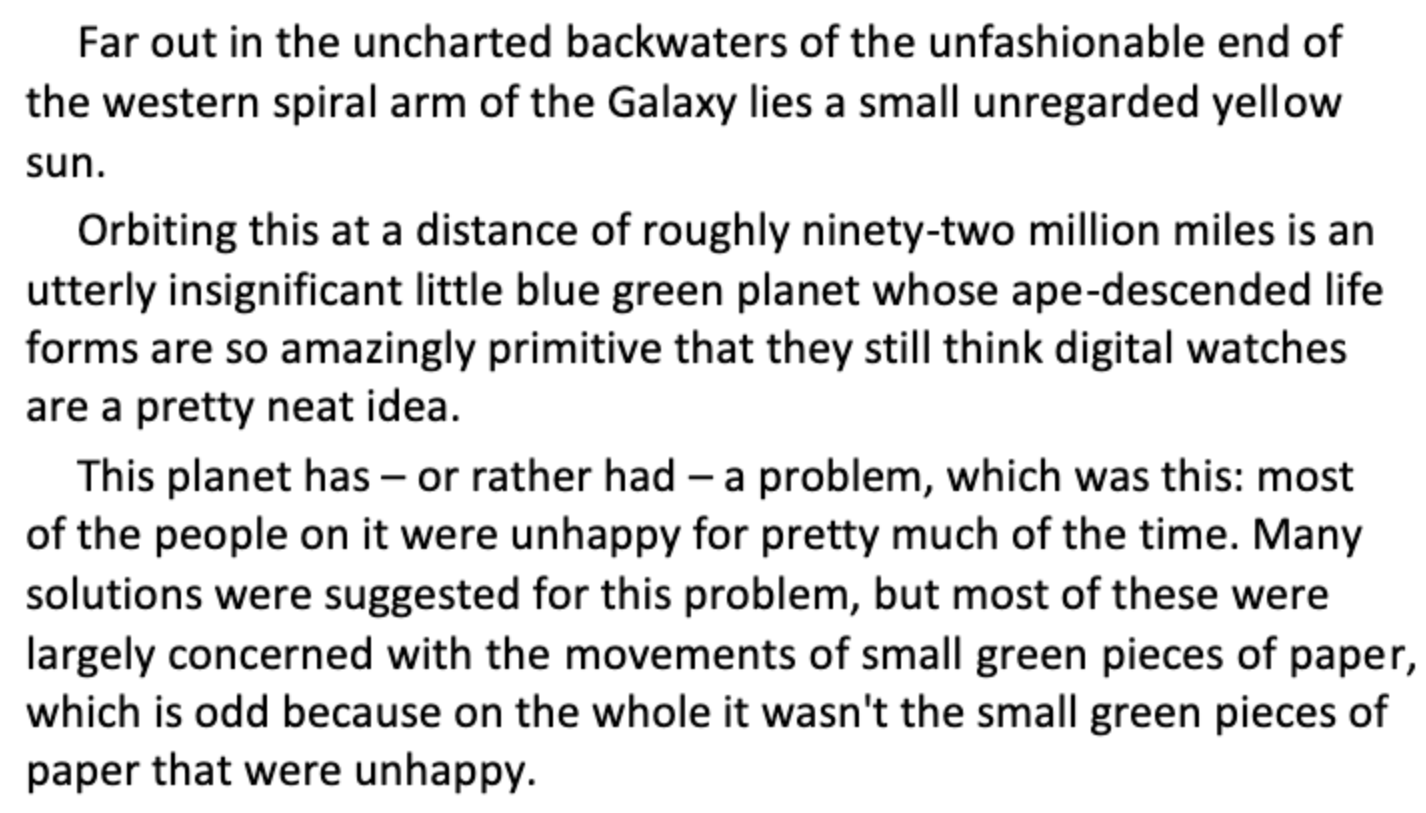

In [ ]:
from PIL import Image
import pytesseract
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 2: Load and preprocess the image
image_path = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/hitchhikers-rotated.png'
image = cv2.imread(image_path)

# Convert the image to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Use Tesseract OCR to detect text orientation and script type
# Specify the path to the Tesseract executable (change this according to your installation)
pytesseract.pytesseract.tesseract_cmd = r'/usr/bin/tesseract'

# Use Tesseract to get the script type and orientation
text_info = pytesseract.image_to_osd(gray)

# Extract rotation angle and script type from the Tesseract output
rotation_angle = int(text_info.split('\n')[2].split(': ')[-1])
script_type = text_info.split('\n')[3].split(': ')[-1]

# Step 4: Display the results
print(f"Rotation Angle: {rotation_angle} degrees")
print(f"Script Type: {script_type}")

# Display the original image with orientation detection
rotated_image = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)  # Rotate the image for display
cv2_imshow(rotated_image)


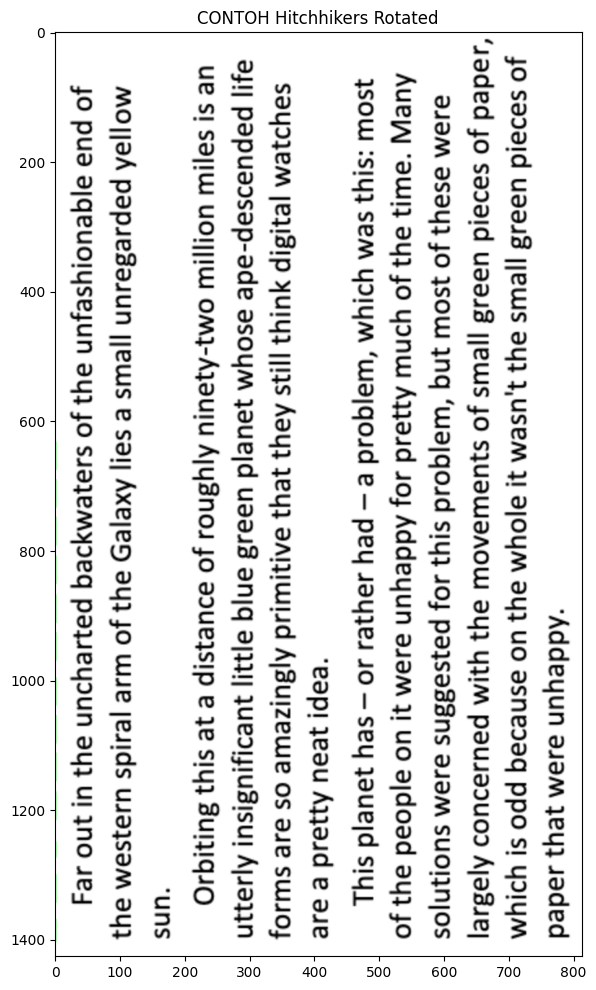

In [ ]:
import cv2
import pytesseract
import matplotlib.pyplot as plt

# Assuming you have defined IMG_DIR correctly
IMG_DIR = '/content/drive/MyDrive/1I Class Informatics Engineering/POLINEMA CLASS TASK/CLASS Semester 5/(MACHLEARN_TI) Machine Learning/Meet_12/images/'

# Read the image
image = cv2.imread(IMG_DIR + 'hitchhikers-rotated.png')

# Check if the image is loaded successfully
if image is not None:
    # Get the dimensions (height, width, channels) of the image
    h, w, c = image.shape

    # Use pytesseract.image_to_boxes() to get character box information
    boxes = pytesseract.image_to_boxes(image)

    # Iterate through each line of the result and draw boxes on the image using OpenCV
    for b in boxes.splitlines():
        b = b.split(' ')
        image = cv2.rectangle(image, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

    # Separate color channels to convert from BGR to RGB
    b, g, r = cv2.split(image)
    rgb_img = cv2.merge([r, g, b])

    # Display the image with character boxes
    plt.figure(figsize=(16, 12))
    plt.imshow(rgb_img)
    plt.title('CONTOH Hitchhikers Rotated')
    plt.show()
else:
    print("Error: Could not read the image.")